In [76]:
import pandas as pd

url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Classification/Diabetes_Data.csv"
data = pd.read_csv(url)
data

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,男生,1
1,66,102,128.1,女生,1
2,59,65,103.9,男生,0
3,46,117,94.8,女生,0
4,45,79,57.8,男生,0
...,...,...,...,...,...
395,72,63,97.1,女生,0
396,22,117,156.7,女生,1
397,31,76,119.0,男生,0
398,36,65,96.3,女生,1


In [77]:
#label encoding
data['Gender'] = data['Gender'].map({'男生':1, '女生':0})
data

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,1,1
1,66,102,128.1,0,1
2,59,65,103.9,1,0
3,46,117,94.8,0,0
4,45,79,57.8,1,0
...,...,...,...,...,...
395,72,63,97.1,0,0
396,22,117,156.7,0,1
397,31,76,119.0,1,0
398,36,65,96.3,0,1


In [78]:
#訓練集和測試集
from sklearn.model_selection import train_test_split

x = data[['Age','Weight','BloodSugar','Gender']]
y = data['Diabetes']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=87)
#預設為隨機分割資料 若想要分割的資料集為固定的可加上random_state並指定一數字(自訂)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
#轉換為矩陣型式方便計算

In [79]:
#scikit learn介紹
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)
y_pred = lg_model.predict(x_test)
(y_pred==y_test).sum() / len(y_test)

0.9

In [80]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)
(y_pred==y_test).sum() / len(y_test)

0.8625

In [21]:
#使用標準化((x-x.mean())/標準差)做特徵縮放
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)#計算標準差
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
#最終明顯加快了gradient descent的速度

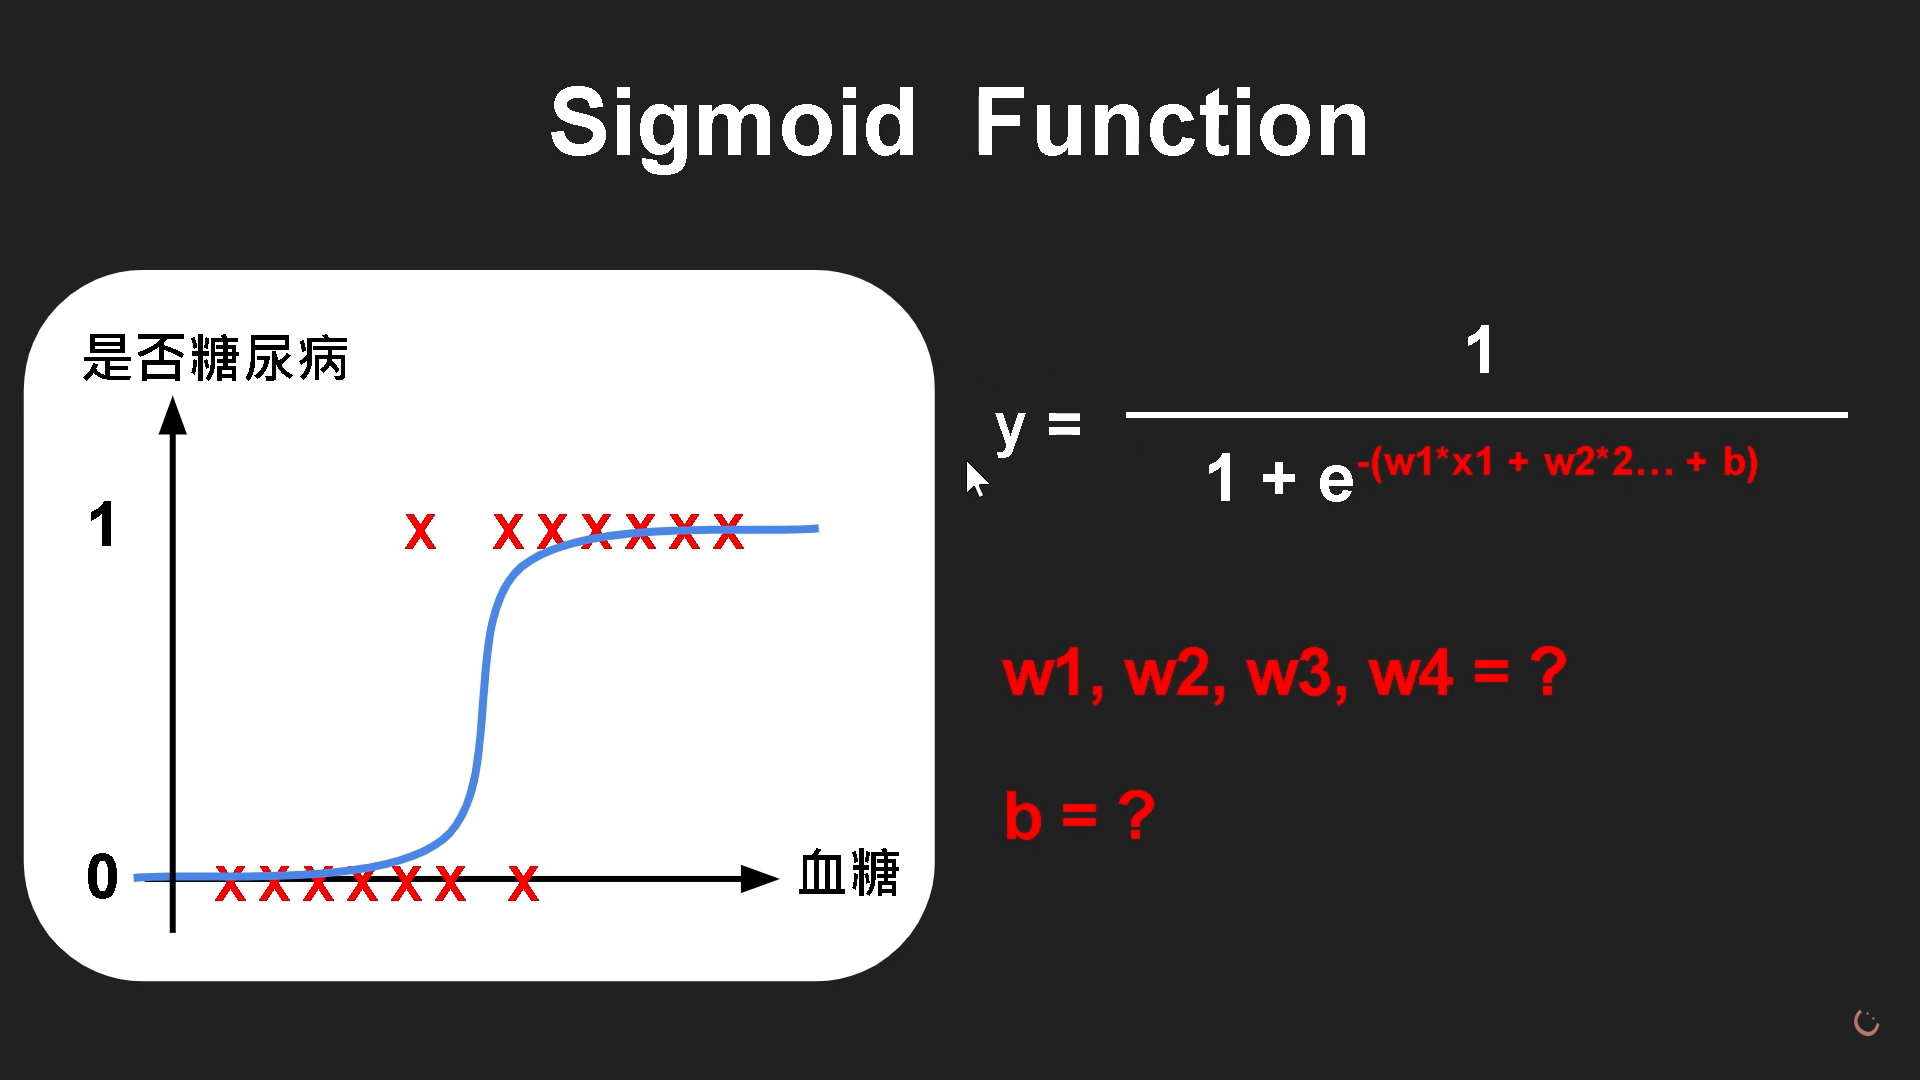

In [28]:
import numpy as np

def sigmoid(z):
    return 1/(1+np.exp(-z))

w = np.array([1, 2, 3, 4])
b = 1
z = (w*x_train).sum(axis=1) + b

y_pred = sigmoid(z)
#呼叫sigmoid(z)可以發現每個值都介於0到1之間 代表原本的多元線性回歸遭到彎曲

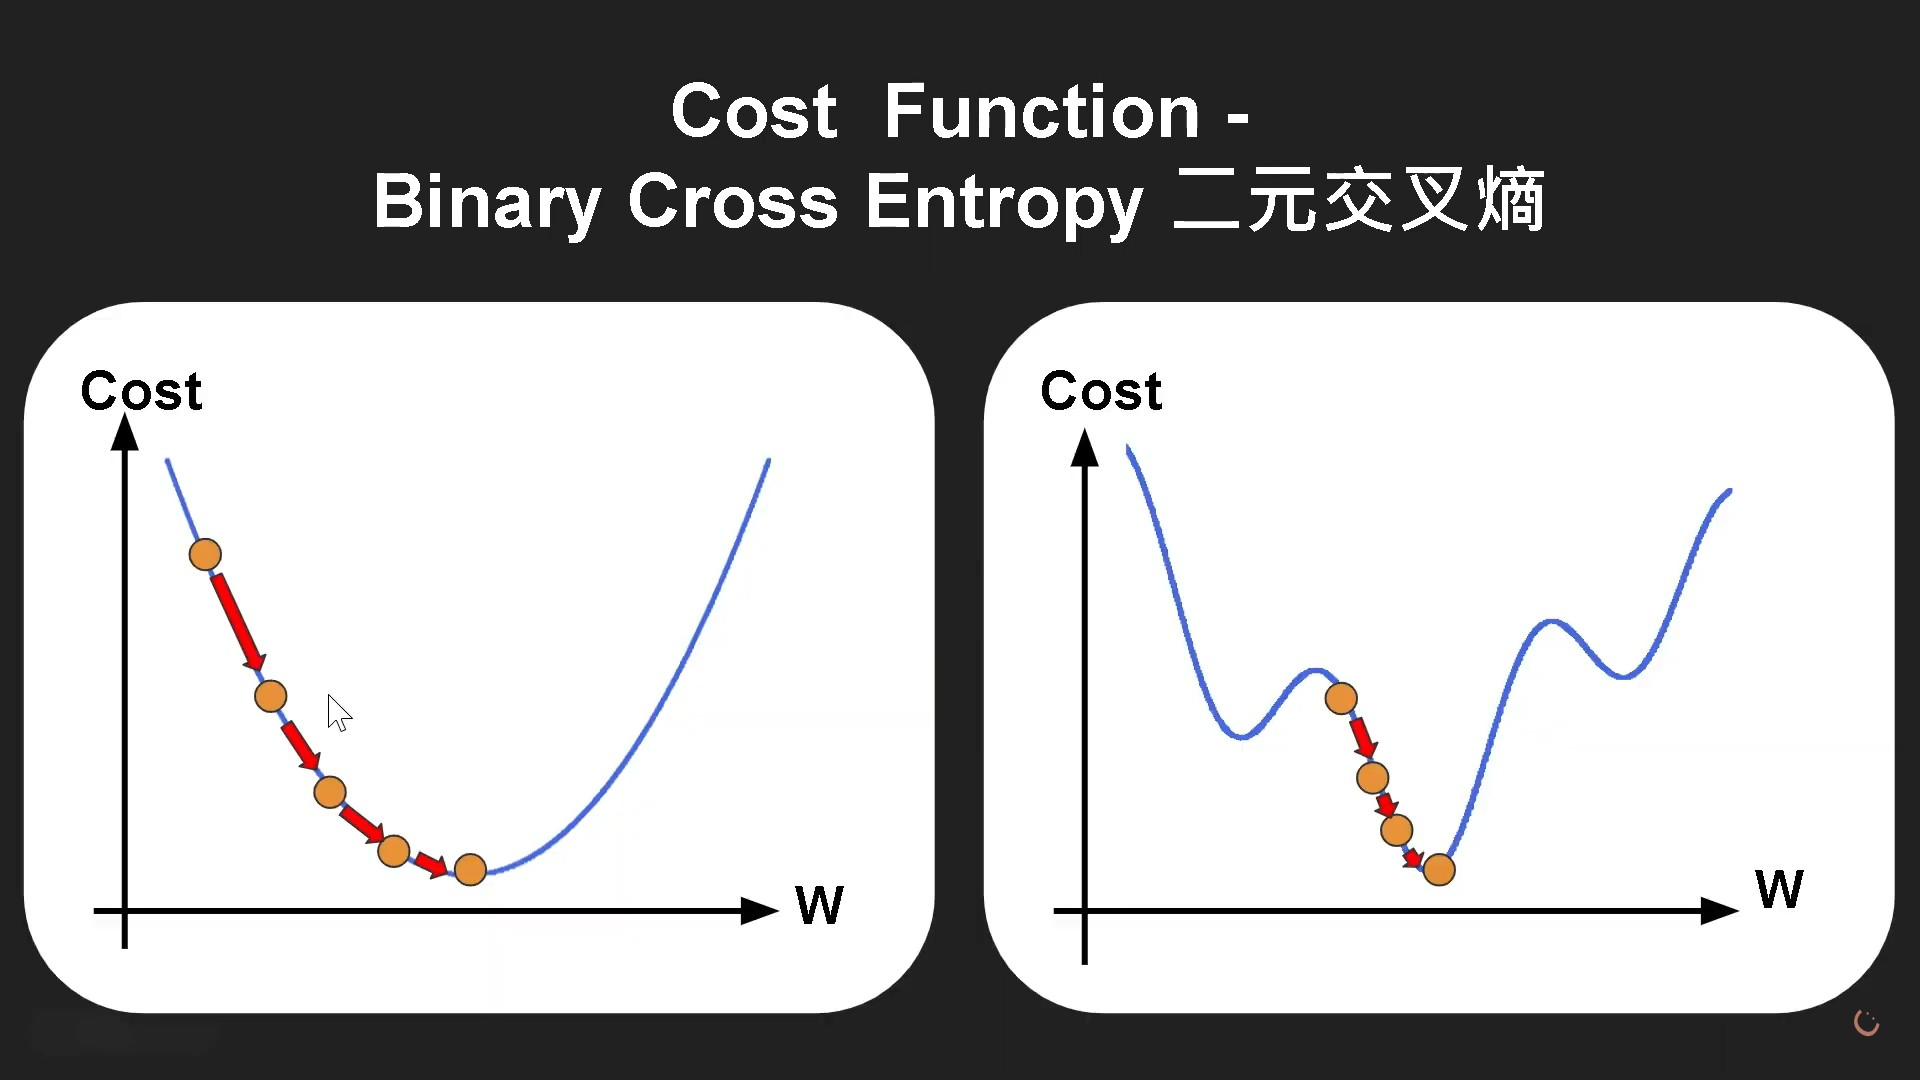

In [30]:
#用之前的平方差方法可能只找到local minimum 但是應該是要找到global minimum
#cost function - binary cross entropy(二元交叉熵)
#當 y=1, cost = -log(y_pred)
#當 y=0, cost = -log(1-y_pred)
#cost = -y * log(y_pred) - (1-y) * log(1-y_pred)
def compute_cost(x, y, w, b):
    z = (w*x).sum(axis=1) + b
    y_pred = sigmoid(z)
    cost =  -y * np.log(y_pred) - (1-y) * np.log(1-y_pred)
    cost = cost.mean()
    return cost

In [38]:
w = np.array([1, 4, 2, 4])
b = 2
compute_cost(x_train, y_train, w, b)

1.9542777292019753

In [39]:
#optimizer - gradient descent
#以下為微分之後各參數之斜率
#w1_gradient = x1*(y_pred - y)
#w2_gradient = x2*(y_pred - y)
#w3_gradient = x3*(y_pred - y)
#w4_gradient = x4*(y_pred - y)
#b_gradient = (y_pred - y)
z = (w*x_train).sum(axis=1) + b
y_pred = sigmoid(z)
b_gradient = (y_pred - y_train).mean()
w_gradient = np.zeros(x_train.shape[1])
#x_train為一(28,4)之陣列 取他的行資料

for i in range(x_train.shape[1]):
    w_gradient[i] = (x_train[:, i]*(y_pred - y_train)).mean()
    #[:, i]表示取第一個維度的所有資料後只取第i行的元素(x_train為二維矩陣)
    
w_gradient, b_gradient

(array([ 0.04176112,  0.13246515, -0.12945482,  0.21952511]),
 0.29409673395976715)

In [35]:
#定義計算斜率之函式
def compute_gradient(x, y, w, b):
    z = (w*x).sum(axis=1) + b
    y_pred = sigmoid(z)
    w_gradient = np.zeros(x.shape[1])
    b_gradient = (y_pred - y).mean()
    for i in range(x.shape[1]):
        w_gradient[i] = (x[:, i]*(y_pred - y)).mean()
    
    return w_gradient, b_gradient

In [40]:
w = np.array([1, 4, 2, 4])
b = 2
compute_gradient(x_train, y_train, w, b)

(array([ 0.04176112,  0.13246515, -0.12945482,  0.21952511]),
 0.29409673395976715)

In [43]:
w = np.array([1, 2, 2, 3])
b = 5
learning_rate = 1
w_gradient, b_gradient = compute_gradient(x_train, y_train, w, b)
print(compute_cost(x_train, y_train, w, b))

w = w-w_gradient*learning_rate
b = b-b_gradient*learning_rate
print(compute_cost(x_train, y_train, w, b))

2.8154062345431683
2.487342502355539


In [45]:
np.set_printoptions(formatter={'float': '{: .2e}'.format})
#因為w和w_gradient為陣列形式 多加此行固定輸出資料格式以對齊

def gradient_descent(x, y, w_init, b_init, learning_rate, cost_function, gradient_function, run_iter, p_iter):
    
    c_hist = []
    w_hist = []
    b_hist = []
    
    w = w_init
    b = b_init
    
    for i in range(run_iter):
        w_grediant, b_grediant = compute_gradient(x,y,w,b)

        #透過gradient descent來更新w和b的值
        w = w-w_grediant*learning_rate
        b = b-b_grediant*learning_rate
        #計算新的cost
        cost = compute_cost(x,y,w,b)
        #把產出的值存入陣列之中
        w_hist.append(w)
        b_hist.append(b)
        c_hist.append(cost)
        #避免output過多只顯示每1000次的結果
        if i%p_iter ==0:
            print(f'Interation:{i:5} : Cost:{cost: .2e}, w:{w:}, b:{b: .2e}, w_gradient:{w_grediant}, b_gradient:{b_grediant: .2e}')
            #空格.2e表示於左側填充空格(用於對齊)並只顯示以科學記號表示後2位數的結果
    return w, b, w_hist, b_hist, c_hist

In [47]:
w_init = np.array([1, 2, 2, 3])
b_init = 5
learning_rate = 1
run_iter = 10000
p_iter = 1000

w_final, b_final, w_hist, b_hist, c_hist = gradient_descent(x_train, y_train, w_init, b_init, learning_rate, compute_cost, compute_gradient, run_iter, p_iter)

Interation:    0 : Cost: 2.49e+00, w:[ 9.70e-01  2.00e+00  2.21e+00  2.85e+00], b: 4.48e+00, w_gradient:[ 2.95e-02 -1.23e-03 -2.09e-01  1.50e-01], b_gradient: 5.19e-01
Interation: 1000 : Cost: 2.30e-01, w:[-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b:-2.24e+00, w_gradient:[ 5.36e-07  1.44e-06 -7.74e-06  4.51e-07], b_gradient: 3.32e-06
Interation: 2000 : Cost: 2.30e-01, w:[-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b:-2.24e+00, w_gradient:[ 4.40e-10  1.18e-09 -6.36e-09  3.70e-10], b_gradient: 2.73e-09
Interation: 3000 : Cost: 2.30e-01, w:[-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b:-2.24e+00, w_gradient:[ 3.61e-13  9.73e-13 -5.22e-12  3.04e-13], b_gradient: 2.24e-12
Interation: 4000 : Cost: 2.30e-01, w:[-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b:-2.24e+00, w_gradient:[ 2.98e-16  8.01e-16 -4.30e-15  2.44e-16], b_gradient: 1.92e-15
Interation: 5000 : Cost: 2.30e-01, w:[-2.53e-01 -3.06e-01  4.62e+00 -1.58e-01], b:-2.24e+00, w_gradient:[ 1.94e-17  2.36e-17 -4.33e-16  1.39e-17], b_gradient: 2

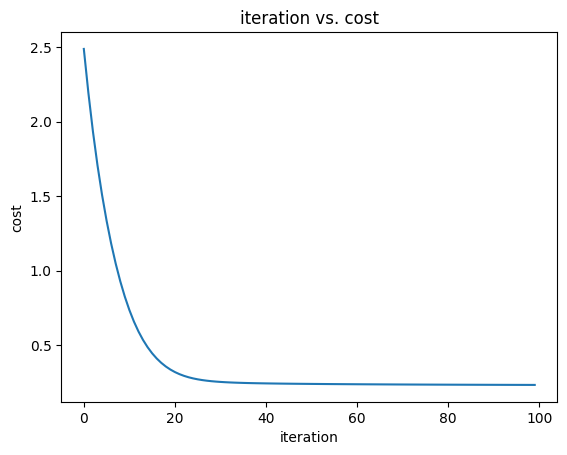

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0,100), c_hist[:100])
plt.title('iteration vs. cost')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

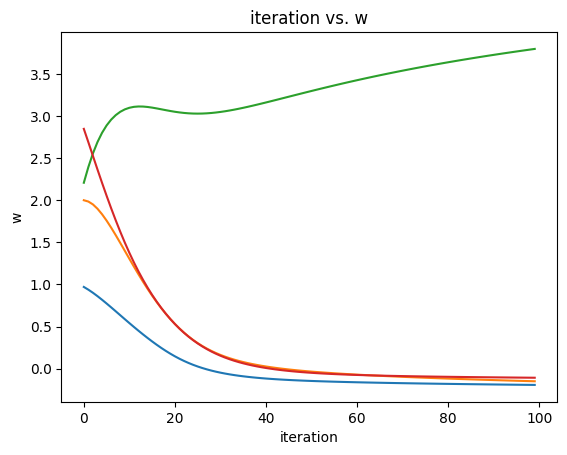

In [51]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0,100), w_hist[:100])
plt.title('iteration vs. w')
plt.xlabel('iteration')
plt.ylabel('w')
plt.show()

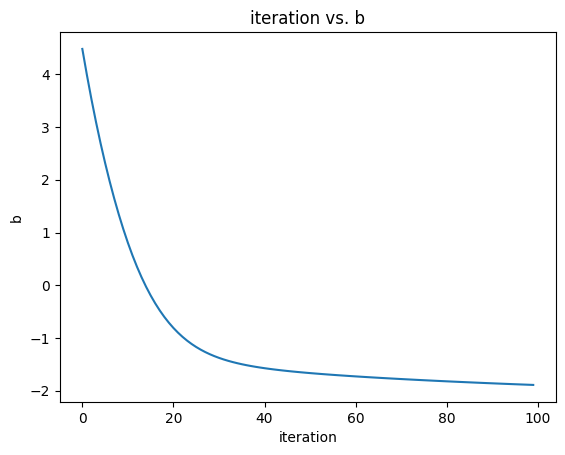

In [52]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(0,100), b_hist[:100])
plt.title('iteration vs. b')
plt.xlabel('iteration')
plt.ylabel('b')
plt.show()

In [53]:
w_final, b_final

(array([-2.53e-01, -3.06e-01,  4.62e+00, -1.58e-01]), -2.2423167596289706)

In [60]:
z = (w_final * x_test).sum(axis=1) + b_final
y_pred = sigmoid(z)#預測此人得到糖尿病之機率為何
y_pred = np.where(y_pred>0.5, 1, 0)#機率大於50%的改為1反之0
acc = (y_pred == y_test).sum() / len(y_test) * 100#把預測成功(Ture)的個數相加 最終結果為72/80
print(f'正確率為{acc}%')

正確率為90.0%


In [62]:
#72歲 92公斤 102血糖 女生
#62歲 52公斤 120血糖 男生
x_real = np.array([[72, 92, 102, 0], [62, 52, 120, 1]])
x_real = scaler.transform(x_real)
z = (w_final*x_real).sum(axis=1) + b_final
y_real = sigmoid(z)
y_real

array([ 4.35e-02,  7.08e-01])